
Digit Classification Problem



In [1]:
mkdir digit_recognition

In [2]:
!pwd


/content


In [3]:
!cd digit_recognition
#digit classification sup/unsup learning?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential #to stack layers one-after-other
from keras.layers import Dense #size,type of layer
from keras.layers import Flatten #converts 2D to 1D
from keras.datasets import mnist
from keras.layers.convolutional import Conv2D #to put convolution layer
from keras.layers.convolutional import MaxPooling2D #to reduce dimensionality
from keras.utils import np_utils
import itertools


In [6]:
#load data
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


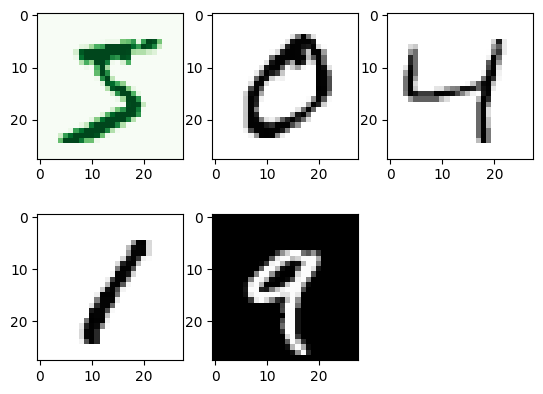

In [7]:
#plot images
plt.subplot(231)
plt.imshow(x_train[0], plt.get_cmap('Greens'))
plt.subplot(232)
plt.imshow(x_train[1], plt.get_cmap('Greys'))
plt.subplot(233)
plt.imshow(x_train[2], plt.get_cmap('Greys'))
plt.subplot(234)
plt.imshow(x_train[3], plt.get_cmap('Greys'))
plt.subplot(235)
plt.imshow(x_train[4], plt.get_cmap('gray'))
plt.show()


In [8]:
#model
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu')) #Conv2D(#filters,sizefilter,inpshape,activation)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu')) #hidden layer
model.add(Dense(10,activation='softmax')) #possible 10 outputs thus 10 units
#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#loss is categorical_crossentropy since more than 2 outputs

In [9]:
#reshape & resize
xm_train=x_train.reshape((x_train.shape[0],28,28,1)).astype('float32')
xm_test=x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')
xm_train=xm_train/255
xm_test/=255.0

In [11]:
xm_train.shape #one additional column to match input shape

(60000, 28, 28, 1)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
ym_train=(np_utils.to_categorical(y_train)) #convert y to categorical input
ym_test=(np_utils.to_categorical(y_test))


In [14]:
history=model.fit(xm_train,ym_train,validation_data=(xm_test,ym_test),epochs=7,batch_size=200)
#validation data called by system after each epoch to crossverify
#test data at last only
#in each epoch 200*300= 60000 images


Epoch 1/7
300/300 [==============================] - 38s 122ms/step - loss: 0.2424 - accuracy: 0.9313 - val_loss: 0.0861 - val_accuracy: 0.9742
Epoch 2/7
300/300 [==============================] - 38s 127ms/step - loss: 0.0658 - accuracy: 0.9806 - val_loss: 0.0530 - val_accuracy: 0.9825
Epoch 3/7
300/300 [==============================] - 38s 125ms/step - loss: 0.0452 - accuracy: 0.9868 - val_loss: 0.0423 - val_accuracy: 0.9858
Epoch 4/7
300/300 [==============================] - 38s 126ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0412 - val_accuracy: 0.9859
Epoch 5/7
300/300 [==============================] - 52s 172ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 6/7
300/300 [==============================] - 36s 120ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0354 - val_accuracy: 0.9884
Epoch 7/7
300/300 [==============================] - 42s 139ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0356 - val_accuracy:

In [15]:
R1=model.predict(x_test[:])

313/313 [==============================] - 3s 9ms/step


In [17]:
R1

array([[0.        , 0.        , 0.        , ..., 0.99999994, 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [18]:
R2=R1.max(1)
R3=np.argmax(R1,axis=1)#predicted values

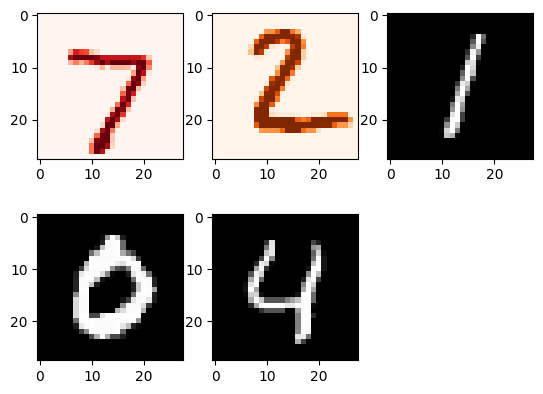

In [19]:
plt.subplot(231)
plt.imshow(x_test[0],cmap=plt.get_cmap('Reds'))
plt.subplot(232)
plt.imshow(x_test[1],cmap=plt.get_cmap('Oranges'))
plt.subplot(233)
plt.imshow(x_test[2],cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(x_test[3],cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(x_test[4],cmap=plt.get_cmap('gray'))


In [20]:
print(R3)

[7 2 1 ... 4 5 6]


In [21]:
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=58b7de92e788e5f3074be514d6151b10c17ff0bf9f7253d8e4a1491823eeef4a
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [22]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix


In [24]:
class_names=['0','1','2','3','4','5','6','7','8','9']
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

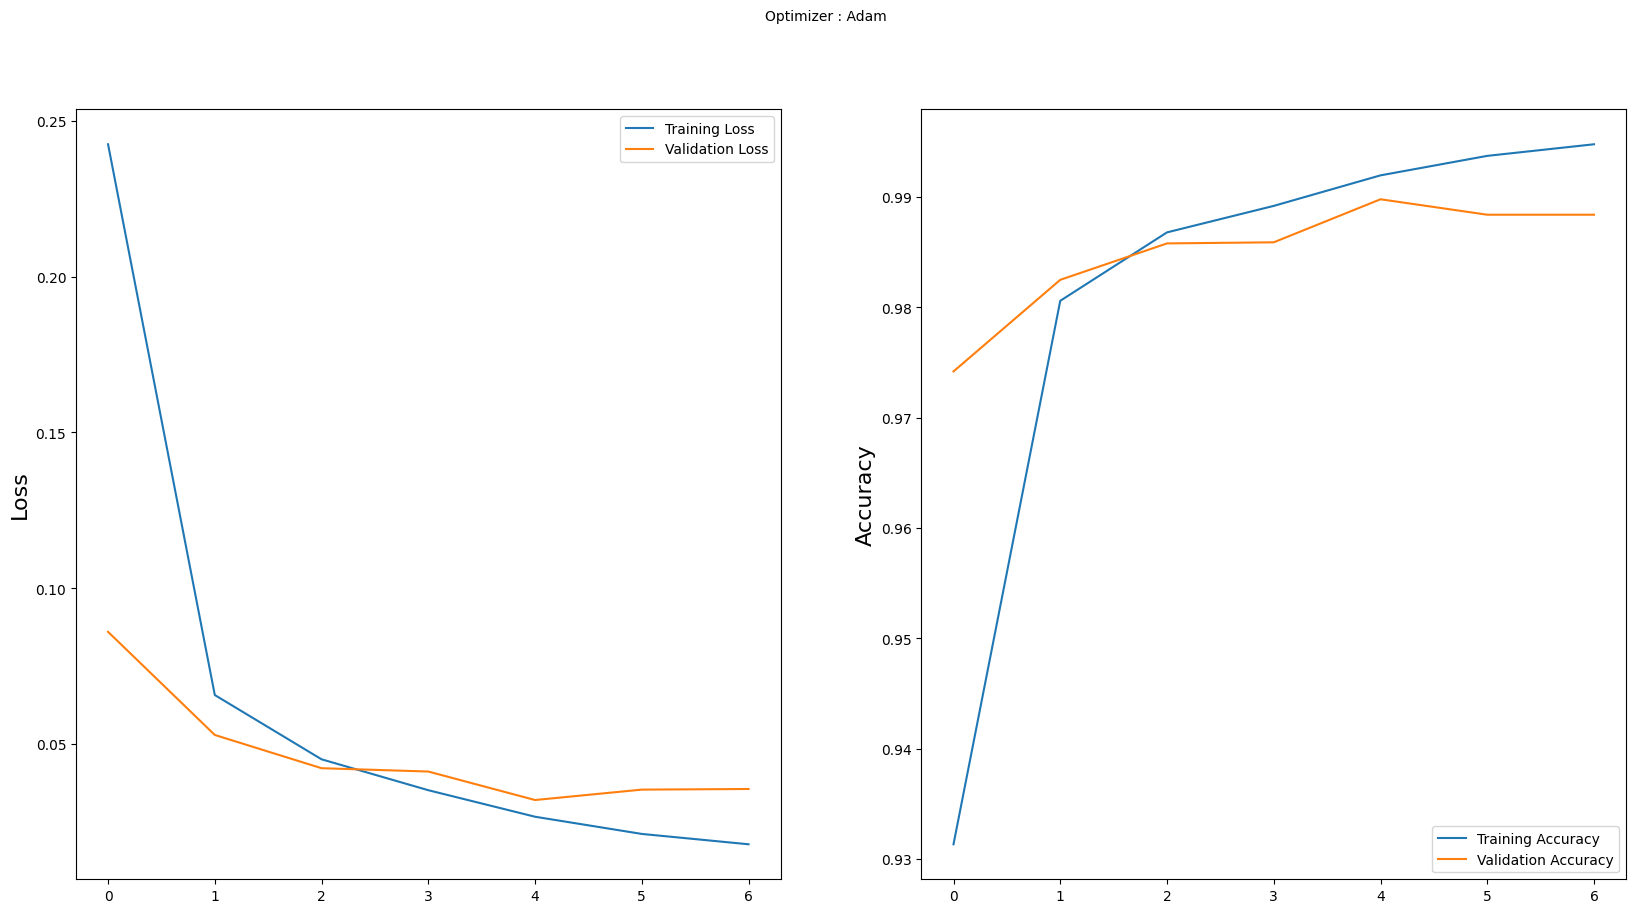

In [27]:
#Model evaluate
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()